In [1]:
from AgentBasedModel import *
from AgentBasedModel.science import *
import AgentBasedModel.utils.math as math

import random
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Random

In [30]:
matrix1 = TransitionMatrix()
for _ in tqdm(range(500)):
    exchange = ExchangeAgent(volume=1000)
    simulator = Simulator(**{
        'exchange': exchange,
        'traders': [Random(exchange, 10**3) for _ in range(20)]
    })
    info = simulator.info
    simulator.simulate(1000, silent=True)
    
    params = {
        'size': 10,
        'window': 5,
        'access': 1
    }
    matrix1.update(general_states(info, **params))

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [06:48<00:00,  1.22it/s]


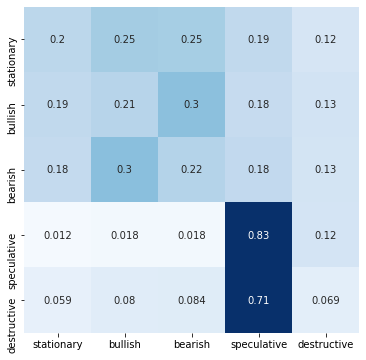

In [31]:
heatmap_transition(matrix1)

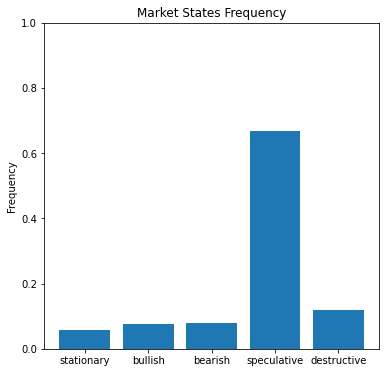

In [32]:
bar_transition(matrix1)

In [33]:
labels = ['stationary', 'bullish', 'bearish', 'speculative', 'destructive']
pd.DataFrame(matrix1.matrix, columns=labels, index=labels).round()

,stationary,bullish,bearish,speculative,destructive
stationary,550,700,683,522,328
bullish,710,790,1119,669,502
bearish,681,1131,823,700,483
speculative,407,579,602,27065,4079
destructive,348,473,495,4157,404


In [34]:
labels = ['stationary', 'bullish', 'bearish', 'speculative', 'destructive']
pd.DataFrame(matrix1.matrix, columns=labels, index=labels).sum(axis=1) /\
pd.DataFrame(matrix1.matrix, columns=labels, index=labels).sum(axis=1).sum()

stationary     0.056796
bullish        0.077347
bearish        0.077918
speculative    0.668000
destructive    0.119939
dtype: float64

### Universalists

In [35]:
matrix2 = TransitionMatrix()
for _ in tqdm(range(500)):
    exchange = ExchangeAgent(volume=1000)
    simulator = Simulator(**{
        'exchange': exchange,
        'traders': [Universalist(exchange, 10**3, access=1) for _ in range(20)]
    })
    info = simulator.info
    simulator.simulate(1000, silent=True)
    
    params = {
        'size': 10,
        'window': 5,
        'access': 1
    }
    matrix2.update(general_states(info, **params))

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [09:36<00:00,  1.15s/it]


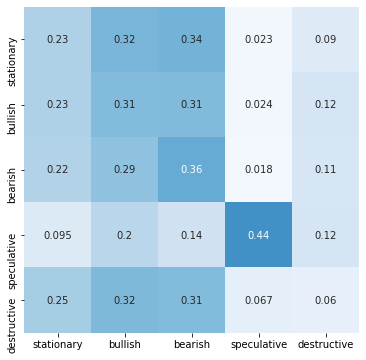

In [36]:
heatmap_transition(matrix2)

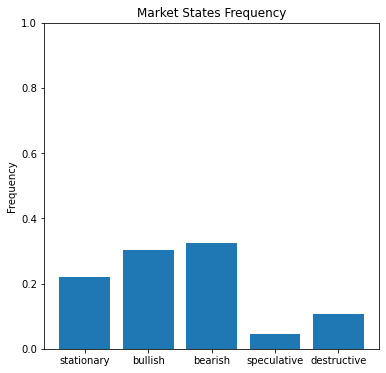

In [37]:
bar_transition(matrix2)

In [38]:
labels = ['stationary', 'bullish', 'bearish', 'speculative', 'destructive']
pd.DataFrame(matrix2.matrix, columns=labels, index=labels).round()

,stationary,bullish,bearish,speculative,destructive
stationary,2457,3506,3635,247,970
bullish,3384,4594,4637,348,1813
bearish,3512,4595,5756,282,1818
speculative,205,442,302,950,262
destructive,1301,1676,1640,353,315


In [39]:
labels = ['stationary', 'bullish', 'bearish', 'speculative', 'destructive']
pd.DataFrame(matrix2.matrix, columns=labels, index=labels).sum(axis=1) /\
pd.DataFrame(matrix2.matrix, columns=labels, index=labels).sum(axis=1).sum()

stationary     0.220714
bullish        0.301551
bearish        0.325776
speculative    0.044102
destructive    0.107857
dtype: float64

### Universalists with MM

In [40]:
matrix3 = TransitionMatrix()
for _ in tqdm(range(500)):
    exchange = ExchangeAgent(volume=1000)
    simulator = Simulator(**{
        'exchange': exchange,
        'traders': [Universalist(exchange, 10**3) for _ in range(20)],
        'events': [MarketMakerIn(0, 10**4)]
    })
    info = simulator.info
    simulator.simulate(1000, silent=True)
    
    params = {
        'size': 10,
        'window': 5,
        'access': 1
    }
    matrix3.update(general_states(info, **params))

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [10:20<00:00,  1.24s/it]


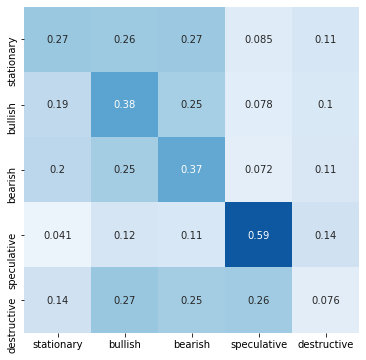

In [41]:
heatmap_transition(matrix3)

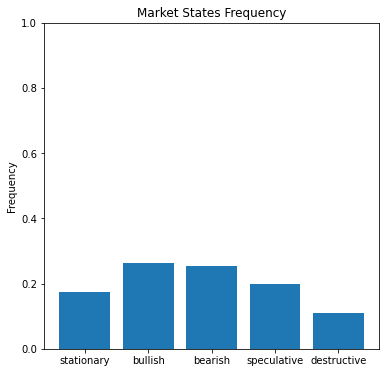

In [42]:
bar_transition(matrix3)

In [43]:
labels = ['stationary', 'bullish', 'bearish', 'speculative', 'destructive']
pd.DataFrame(matrix3.matrix, columns=labels, index=labels).round()

,stationary,bullish,bearish,speculative,destructive
stationary,2319,2256,2296,732,982
bullish,2418,4931,3165,1010,1346
bearish,2478,3129,4587,899,1355
speculative,398,1147,1066,5745,1337
destructive,766,1475,1356,1395,412


In [44]:
labels = ['stationary', 'bullish', 'bearish', 'speculative', 'destructive']
pd.DataFrame(matrix3.matrix, columns=labels, index=labels).sum(axis=1) /\
pd.DataFrame(matrix3.matrix, columns=labels, index=labels).sum(axis=1).sum()

stationary     0.175204
bullish        0.262653
bearish        0.254041
speculative    0.197816
destructive    0.110286
dtype: float64